<a href="https://colab.research.google.com/github/janmejaybhoi/Cotton_Disease_Prediction/blob/master/Cotton_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# Limit GPU memory usage.
# if you get a error while training in local system then run the below command.

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Cotton Disease/train'
valid_path = '/content/drive/My Drive/Cotton Disease/test'

In [4]:
# inception= InceptionV3(input_shape = IMAGE_SIZE + [3] , include_top=True , weights='imagenet')
resnet152V2 =tf.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

In [5]:
# for layer in inception.layers:
#     layer.tarinable = False

for layer in resnet152V2.layers:
    layer.trainable = False

In [6]:
folders = glob('Cotton Disease/train/*')

In [7]:
print(folders)

[]


In [8]:
# inceptionv3
# x= Flatten()(inception.output)
# x= Dense(1024,activation='relu')(x)
# output= Dense(4, activation= 'softmax')(x)
# model = Model(inputs = inception.input, outputs =output )

# For resne152v2
x = Flatten()(resnet152V2.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
model.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'] )

In [11]:
train_datagen = ImageDataGenerator(rescale= 1. /255 ,
                                 rotation_range=0 , 
                                  width_shift_range=0.0,
                                   height_shift_range=0.2,
                                    shear_range=0.2,
                                     zoom_range=0.2,
                                      horizontal_flip=True,
                                       vertical_flip=True,
                                        fill_mode='nearest' )
# No data augmentation should apply for test image 
test_datagen = ImageDataGenerator(rescale= 1.0/255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                      target_size=(224, 224),
                                                       color_mode='rgb',
                                                        class_mode='categorical',
                                                         batch_size=32,)

test_generator = test_datagen.flow_from_directory(valid_path,
                                                  target_size=(224, 224),
                                                       color_mode='rgb',
                                                        class_mode='categorical',
                                                         batch_size=32,)

Found 1992 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [13]:
len(train_generator)

63

In [14]:
history = model.fit(train_generator,
                              steps_per_epoch = len(train_generator),
                              validation_data = test_generator,
                              validation_steps = len(test_generator),
                              epochs= 20   )

Epoch 1/20
63/63 [==============================] - 56s 895ms/step - loss: 1.6487 - accuracy: 0.7897 - val_loss: 0.3708 - val_accuracy: 0.9231
Epoch 2/20
63/63 [==============================] - 52s 827ms/step - loss: 0.9321 - accuracy: 0.8820 - val_loss: 0.3781 - val_accuracy: 0.9231
Epoch 3/20
63/63 [==============================] - 52s 826ms/step - loss: 0.9146 - accuracy: 0.8896 - val_loss: 0.8648 - val_accuracy: 0.8846
Epoch 4/20
63/63 [==============================] - 53s 843ms/step - loss: 0.8408 - accuracy: 0.9071 - val_loss: 0.8899 - val_accuracy: 0.8846
Epoch 5/20
63/63 [==============================] - 52s 826ms/step - loss: 0.8108 - accuracy: 0.9152 - val_loss: 0.8843 - val_accuracy: 0.9359
Epoch 6/20
63/63 [==============================] - 52s 828ms/step - loss: 0.7986 - accuracy: 0.9187 - val_loss: 0.3475 - val_accuracy: 0.9231
Epoch 7/20
63/63 [==============================] - 52s 826ms/step - loss: 0.8490 - accuracy: 0.9207 - val_loss: 0.1810 - val_accuracy: 0.9744

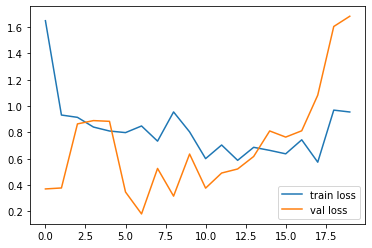

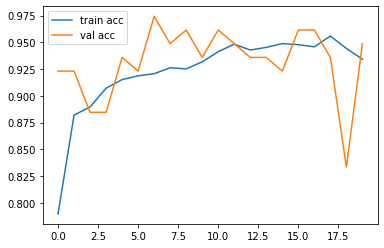

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
y_pred = model.predict(test_generator)

In [17]:
y_pred

array([[2.50346564e-13, 4.93503587e-21, 1.00000000e+00, 8.42034515e-20],
       [0.00000000e+00, 1.44083589e-29, 0.00000000e+00, 1.00000000e+00],
       [6.44750344e-23, 7.33579886e-32, 1.00000000e+00, 1.57916170e-22],
       [0.00000000e+00, 1.00000000e+00, 3.94221184e-23, 1.20356708e-33],
       [6.10282441e-27, 1.00000000e+00, 0.00000000e+00, 5.20159200e-21],
       [1.02109967e-18, 0.00000000e+00, 1.00000000e+00, 1.35945908e-15],
       [3.14736314e-29, 1.00000000e+00, 1.56434153e-28, 7.02906305e-24],
       [5.15851468e-07, 6.46792879e-36, 9.99999523e-01, 1.12963559e-21],
       [8.48978640e-35, 1.00000000e+00, 0.00000000e+00, 4.49608332e-33],
       [9.99963880e-01, 5.02439258e-32, 2.01792619e-15, 3.61170205e-05],
       [2.07939118e-14, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.07846093e-18, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.17334682e-27, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.58451316e-19, 2.27318207e-18, 1.00000000e

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [19]:
y_pred

array([2, 3, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2,
       0, 0, 3, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0])

In [20]:
from tensorflow.keras.preprocessing import image

In [22]:

img = image.load_img('/content/drive/My Drive/Cotton Disease/test/diseased cotton leaf/dis_leaf (248).jpg',target_size= (224,224))
x = image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [23]:
img_data.shape

(1, 224, 224, 3)

In [24]:
model.predict(img_data)

array([[9.9939251e-01, 1.9038285e-14, 2.5074918e-09, 6.0742773e-04]],
      dtype=float32)

In [25]:
a=np.argmax(model.predict(img_data), axis=1)

In [26]:
a

array([0])

In [27]:
from tensorflow.keras.models import load_model
model.save('model_resnet152V2.h5')